In [1]:
from google.colab import files
uploaded = files.upload()

Saving NewspaperData.csv to NewspaperData.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
data1 = pd.read_csv("NewspaperData.csv")
data1

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [5]:
data1.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


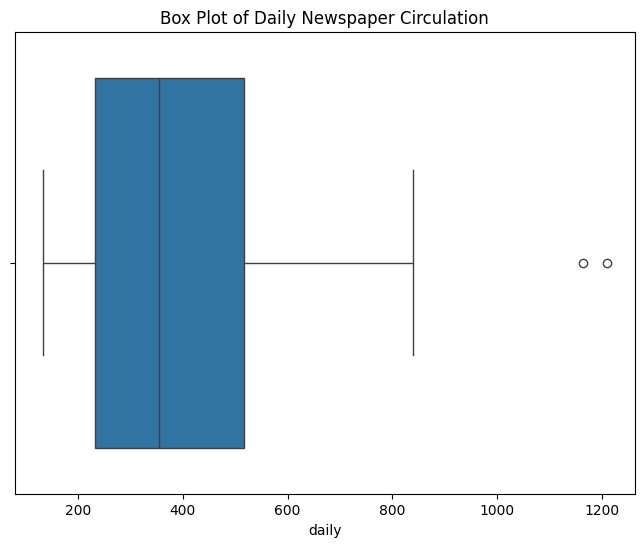

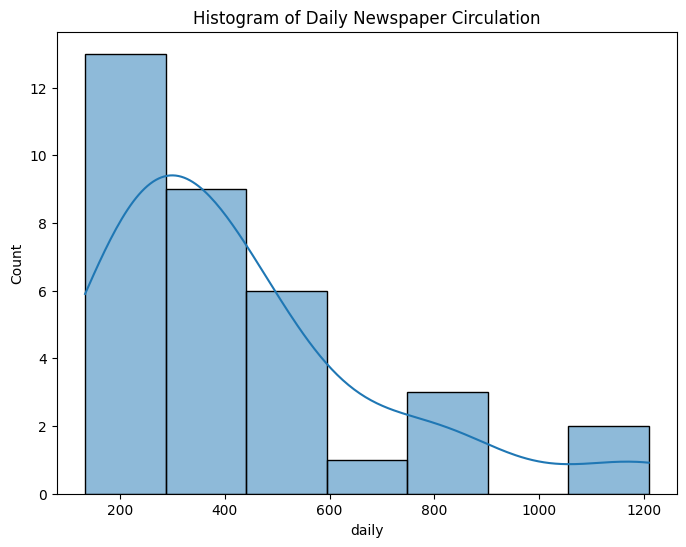

In [6]:

def daily_column_boxplot_histogram_kdplot(data):

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data['daily'])
    plt.title('Box Plot of Daily Newspaper Circulation')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.histplot(data['daily'], kde=True)
    plt.title('Histogram of Daily Newspaper Circulation')
    plt.show()
daily_column_boxplot_histogram_kdplot(data1)

Observation

*  The box plot helps identify outliers in the daily newspaper circulation data. If there are points beyond the whiskers, these indicate unusually high or low circulation values compared to the rest of the data.







In [7]:
data1["sunday"]

,sunday
0,488.506
1,798.298
2,235.084
3,299.451
4,559.093
5,1133.249
6,348.744
7,417.779
8,344.522
9,323.084


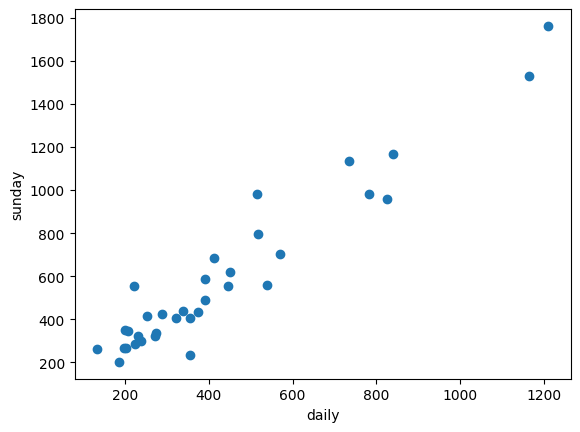

In [8]:
plt.scatter(data1["daily"], data1["sunday"])
plt.xlabel("daily")
plt.ylabel("sunday")
plt.show()

In [9]:
data1["daily"].corr(data1["sunday"])

0.9581543140785462

In [10]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data1).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        03:59:54   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

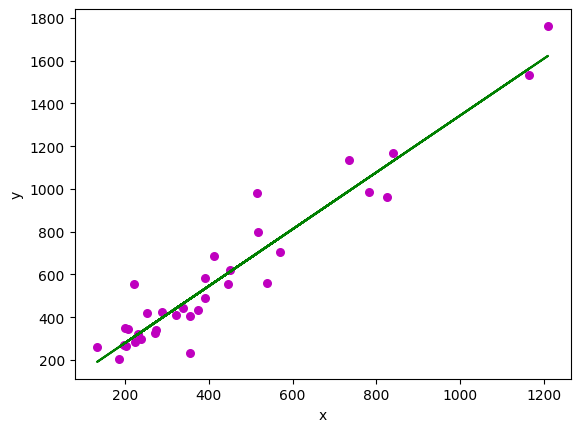

In [12]:
x = data1["daily"].values
y = data1["sunday"].values
plt.scatter(x, y, color = "m", marker = "o", s = 30)
b0 = 13.84
b1 =1.33
y_hat = b0 +b1*x
plt.plot(x, y_hat, color = "g")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

OBSERVATION


*   There are no missing values
*   The daily column values appears to be right skewed

*   The sunday column values also appear to be right skewed
*  There are two outliers in both daily column and also in sunday column as observed from the box





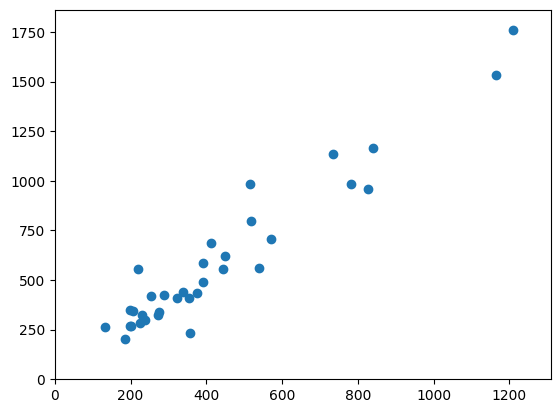

In [13]:
x= data1["daily"]
y = data1["sunday"]
plt.scatter(data1["daily"], data1["sunday"])
plt.xlim(0, max(x) + 100)
plt.ylim(0, max(y) + 100)
plt.show()

In [14]:
data1.corr(numeric_only=True)

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


OBSERVATIONS ON CORRELATION STRENGTH


*   The relationshiop between x (daily) ans y (sunday) is seen to be linear as seen from scatter plot




In [15]:
import statsmodels.formula.api as smf
model1 = smf.ols("sunday~daily",data = data1).fit()

In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        03:59:55   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

observatin

*  the predicted equation is y_hat = beta_0 + beta_1 x


*   beta_0 =13.8356 + beta_ x=1.3397x

*   The probability(p-value) for intercept(brta_0) is 0.707 > 0.05
* Therefore the intercept coefficent may not be that much significat in prediction
* However the p-value for "daily" (beta_1) is 0.00 <0.05
*Therefore the beta_1 coefficent is highly significant and is contributint to prediction






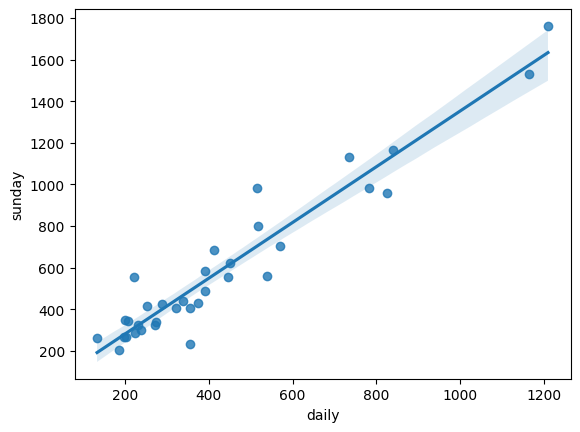

In [17]:
sns.regplot(x="daily", y="sunday", data=data1)
plt.show()

In [19]:
import statsmodels.formula.api as smf
model1 = smf.ols("sunday~daily",data = data1).fit()

In [22]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        04:02:03   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model1.params

,0
Intercept,13.835630
daily,1.339715


In [24]:
print(f'model t-values:\n{model1.tvalues}\n-----------------\nmodel p-values:\n{model1.pvalues}')

model t-values:
Intercept     0.386427
daily        18.934840
dtype: float64
-----------------
model p-values:
Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [27]:
(model1.rsquared,model1.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [29]:
newdata = pd.Series([200, 300, 1500]) # Changed 'series' to 'Series'

In [30]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300
2,1500


In [31]:
model1.predict(data_pred)

,0
0,281.778581
1,415.750057
2,2023.407766


PREDICT ON ALL GIVEN TRAINING DATA

In [32]:
pred =model1.predict(data1["daily"])
pred

,0
0,538.939509
1,706.442705
2,490.275710
3,333.431284
4,734.307432
5,996.884826
6,280.213795
7,352.279731
8,290.090172
9,323.546868


Add predicted  values as a column in data1

In [33]:
data1["Y_hat"] = pred
data1

,Newspaper,daily,sunday,Y_hat
0,Baltimore Sun,391.952,488.506,538.939509
1,Boston Globe,516.981,798.298,706.442705
2,Boston Herald,355.628,235.084,490.275710
3,Charlotte Observer,238.555,299.451,333.431284
4,Chicago Sun Times,537.780,559.093,734.307432
5,Chicago Tribune,733.775,1133.249,996.884826
6,Cincinnati Enquirer,198.832,348.744,280.213795
7,Denver Post,252.624,417.779,352.279731
8,Des Moines Register,206.204,344.522,290.090172
9,Hartford Courant,231.177,323.084,323.546868


In [35]:
data1["residuals"]= data1["sunday"]-data1["Y_hat"]
data1

,Newspaper,daily,sunday,Y_hat,residuals
0,Baltimore Sun,391.952,488.506,538.939509,-50.433509
1,Boston Globe,516.981,798.298,706.442705,91.855295
2,Boston Herald,355.628,235.084,490.275710,-255.191710
3,Charlotte Observer,238.555,299.451,333.431284,-33.980284
4,Chicago Sun Times,537.780,559.093,734.307432,-175.214432
5,Chicago Tribune,733.775,1133.249,996.884826,136.364174
6,Cincinnati Enquirer,198.832,348.744,280.213795,68.530205
7,Denver Post,252.624,417.779,352.279731,65.499269
8,Des Moines Register,206.204,344.522,290.090172,54.431828
9,Hartford Courant,231.177,323.084,323.546868,-0.462868


In [36]:
mse = np.mean((data1["daily"]-data1["Y_hat"])**2)
rmse = np.sqrt(mse)
print("MSE: ",mse)
print("RMSE: ",rmse)

MSE:  33794.87469205262
RMSE:  183.83382358002734


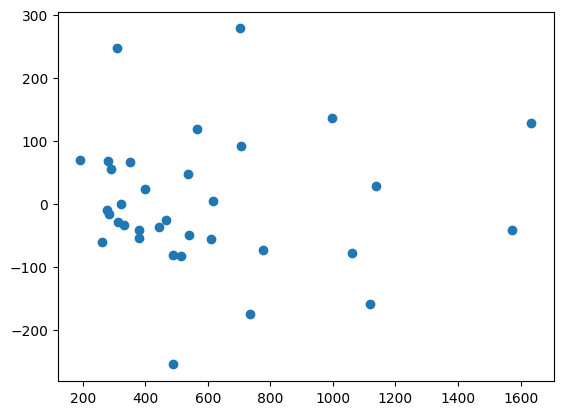

In [38]:
plt.scatter(data1["Y_hat"], data1["residuals"])

OBSERVATION


* The appears to be no trend and the residuals are randomly placed arpund the zero error line
*Hence the assumption of homoscedasticty is satisfied (constant variance in residuls)


#plot the q-q plot(to check the normality of residuals)

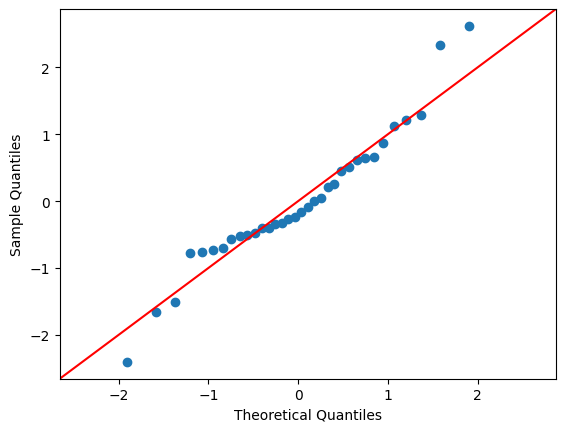

In [41]:
import statsmodels.api as sm
sm.qqplot(data1["residuals"], line='45', fit=True)
plt.show()

<Axes: xlabel='residuals', ylabel='Count'>

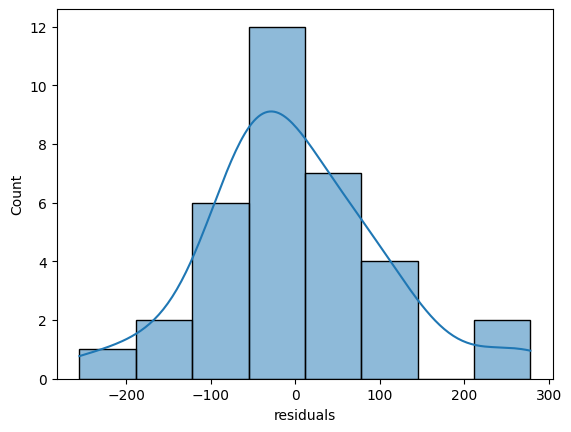

In [42]:
sns.histplot(data1["residuals"], kde=True)

OBSERVATIONS


*The data points are seen to closely follow the reference line of normality
*Hence the residuals are approxiametly normally distributed as also can be seen from the kde plot

